In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Read the chennai dataset
df1 = pd.read_csv("../input/housing-prices-in-india-chennai/Housing-Prices-in-Chennai.csv")


In [3]:
# Inspect the DataFrame using shape, info and head
df1.shape

(5014, 40)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5014 entries, 0 to 5013
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                5014 non-null   int64 
 1   Area                 5014 non-null   int64 
 2   Location             5014 non-null   object
 3   No. of Bedrooms      5014 non-null   int64 
 4   Resale               5014 non-null   int64 
 5   MaintenanceStaff     5014 non-null   int64 
 6   Gymnasium            5014 non-null   int64 
 7   SwimmingPool         5014 non-null   int64 
 8   LandscapedGardens    5014 non-null   int64 
 9   JoggingTrack         5014 non-null   int64 
 10  RainWaterHarvesting  5014 non-null   int64 
 11  IndoorGames          5014 non-null   int64 
 12  ShoppingMall         5014 non-null   int64 
 13  Intercom             5014 non-null   int64 
 14  SportsFacility       5014 non-null   int64 
 15  ATM                  5014 non-null   int64 
 16  ClubHo

In [5]:
# View the first five records
df1.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,5500000,1310,Perungalathur,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,Madhavaram,2,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,8205000,1307,Karapakkam,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,23400000,3600,Thiruvidandhai,3,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10100000,1700,Iyappanthangal,3,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


Since 0 and 1 tells us that the house comes with amenities or not and 9 in the dataset means not mentioned. So we will convert all the 9 to nan and then drop all the missing values.

In [6]:
#  Convert all the 9 to nan and then drop all the missing values.
df1.replace(9, np.nan, inplace=True)
df1.dropna(inplace=True)

# The Prices are in Rupees, 1 dollar is equivalent to 80 india rupees, convert area to square meter from square feet
df1["Price_usd"] = (df1["Price"] / 80).round(2)
df1["Area_m2"] = (df1["Area"] / 10.76).round(2)

# Drop "Price" and "Area" column
df1.drop(columns=["Price"], inplace=True)
df1.drop(columns=["Area"], inplace=True)

In [7]:
df1.shape

(2233, 40)

In [8]:
# View the first five records
df1.head()

,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Price_usd,Area_m2
0,Perungalathur,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68750.0,121.75
1,Madhavaram,2,0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66875.0,104.65
2,Karapakkam,3,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102562.5,121.47
3,Thiruvidandhai,3,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,292500.0,334.57
4,Iyappanthangal,3,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126250.0,157.99


In [9]:
# Exploratory Data Analysis
df1["Location"].value_counts().head(10)

Medavakkam          120
Nanmangalam         104
Karapakkam          100
Avadi                93
Sholinganallur       84
Iyappanthangal       63
Thoraipakkam OMR     60
Selaiyur             55
Navallur             52
Mogappair            50
Name: Location, dtype: int64

In [10]:
# View the Area_m2 and Price_usd statistics using describe meth# View the first five record
df1[["Area_m2", "Price_usd"]].describe()

,Area_m2,Price_usd
count,2233.000000,2.233000e+03
mean,110.490967,1.037667e+05
std,55.440135,1.292166e+05
min,35.220000,2.500000e+04
25%,80.110000,5.000000e+04
50%,96.470000,7.125000e+04
75%,127.230000,1.031250e+05
max,672.860000,2.375000e+06


Data Visualization

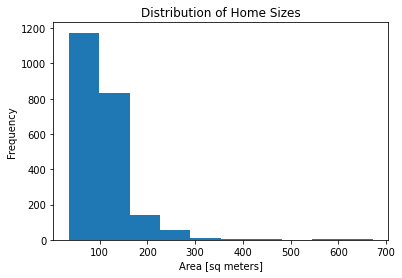

In [11]:
# Lets create a histogram of Area
plt.hist(df1["Area_m2"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Sizes");

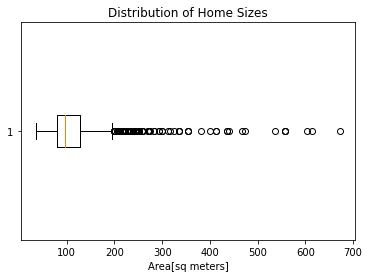

In [12]:
plt.boxplot(df1["Area_m2"], vert=False)
plt.xlabel("Area[sq meters]")
plt.title("Distribution of Home Sizes");

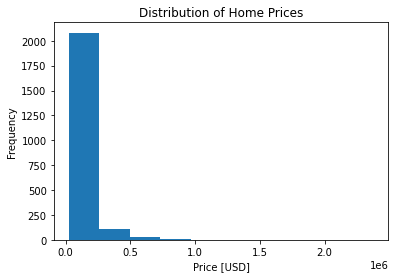

In [13]:
# Lets create a histogram of Price
plt.hist(df1["Price_usd"])
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Prices");

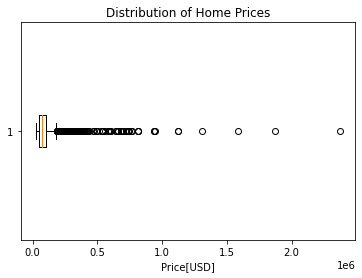

In [14]:
plt.boxplot(df1["Price_usd"], vert=False)
plt.xlabel("Price[USD]")
plt.title("Distribution of Home Prices");

In [15]:
# Use the groupby method to create a series named mean price by location
mean_price_by_location = df1.groupby("Location")["Price_usd"].mean().round(2).sort_values(ascending=False).head(10)
mean_price_by_location

Location
Teynampet               825000.00
Nungambakkam            755546.87
Raja Annamalai Puram    720576.92
Alwarpet                618625.00
Royapettah              579000.00
Purasaiwakkam           487500.00
Chetpet                 425416.67
Kilpauk                 385625.00
Kotturpuram             362500.00
Thiruvidandhai          353437.50
Name: Price_usd, dtype: float64

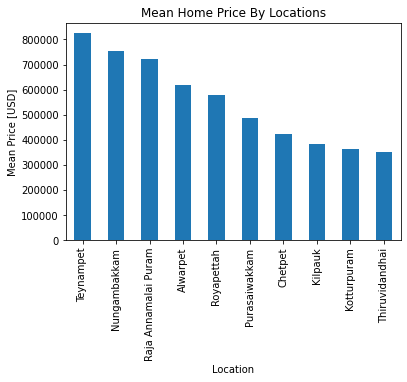

In [16]:
# use mean price by location to create a bar chart 
mean_price_by_location.plot(
    kind="bar",
    xlabel="Location",
    ylabel="Mean Price [USD]",
    title="Mean Home Price By Locations"
);

In [17]:
df1["Price_per_m2"] = df1["Price_usd"] / df1["Area_m2"]
df1.head()

,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Price_usd,Area_m2,Price_per_m2
0,Perungalathur,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68750.0,121.75,564.681725
1,Madhavaram,2,0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66875.0,104.65,639.034878
2,Karapakkam,3,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102562.5,121.47,844.344283
3,Thiruvidandhai,3,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,292500.0,334.57,874.256508
4,Iyappanthangal,3,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126250.0,157.99,799.101209


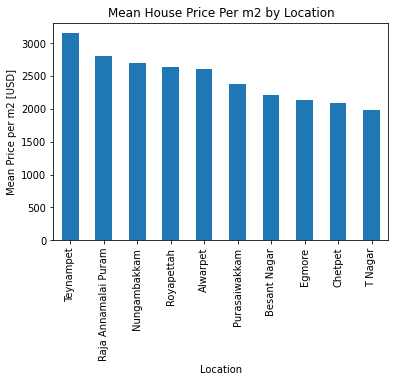

In [18]:
(
    df1
    .groupby("Location")
    ["Price_per_m2"].mean().round(2)
    .sort_values(ascending=False).head(10)
    .plot(
        kind="bar",
        xlabel="Location",
        ylabel="Mean Price per m2 [USD]",
        title="Mean House Price Per m2 by Location"
    )
);

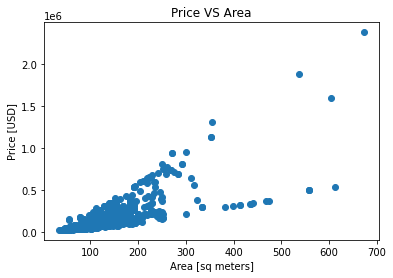

In [19]:
plt.scatter(x=df1["Area_m2"], y=df1["Price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Price VS Area");

In [20]:
p_correlation = df1["Area_m2"].corr(df1["Price_usd"])
print(p_correlation)

0.7707860633961785


In [21]:
# Lets subset to Alwarpet
df1_alwarpet = df1[df1["Location"] == "Alwarpet"]
df1_alwarpet.shape

(10, 41)

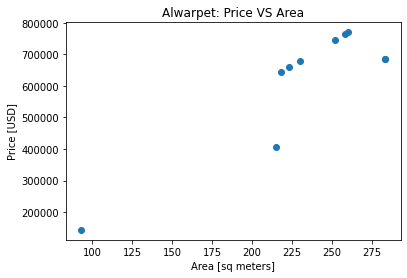

In [22]:
plt.scatter(x=df1_alwarpet["Area_m2"], y=df1_alwarpet["Price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Alwarpet: Price VS Area");

In [23]:
p_correlation = df1_alwarpet["Area_m2"].corr(df1_alwarpet["Price_usd"])
p_correlation

0.8922017027445386

Looking at the scatter plots and correlation coefficients, there seem to be a very strong relationship between size and price. The interpretation is that there is a relationship between size and price in Chennai. Though other factors may still influence price.